# Predicting House Price with Linear Regression Model (on Kaggle competition dataset)

# Problem Statement

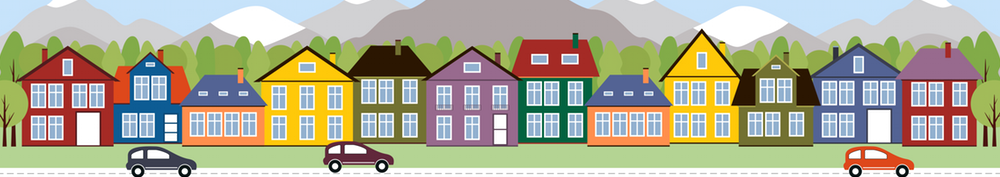

## Business context

In the real estate market, accurately predicting a home's sale price is crucial for buyers, sellers, and real estate agents. Various factors influence a home's final price, and sometimes, unexpected or less obvious features can have a significant impact.

In this project, we'll explore how different features (including some that might initially seem insignificant) affect the overall value of a property. By analyzing a dataset with 79 explanatory variables, we'll uncover the nuances of how each factor contributes to home pricing.

## Specific Objectives

This project focuses on **implementing and practicing the Linear Regression model** using a given dataset. The goal is to understand the model's mechanics, perform data preprocessing, train and evaluate the model, and improve its performance through tuning.

# Get and Download the Data

## Get data from kaggle

Link for 'Data' page on Kaggle competetition page - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [ ]:
# Download the ZIP file
!kaggle competitions download -c house-prices-advanced-regression-techniques

In [1]:
import zipfile # module for reading and extracting ZIP archives
import os      # module for interacting with local files

zip_file_path = 'house-prices-advanced-regression-techniques.zip' # path of zip archive in current working directory
extraction_directory = 'Predicting-House-Price-with-Linear-Regression-Model'  # name of a new folder in current working directory to extract data to in future

# use 'with' construct to open and then close the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref: # open in reading mode
    zip_ref.extractall(extraction_directory) #extract all files to `extraction_directory`

# Verify the extraction
os.listdir(extraction_directory)

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

## Download the data to Jupyter Notebook

In [2]:
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

train_csv_path = extraction_directory + '/train.csv'
train_csv_path

'Predicting-House-Price-with-Linear-Regression-Model/train.csv'

In [3]:
prices_df = pd.read_csv(train_csv_path)

# Exploratory Data Analysis

## Overview

In [4]:
prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are 79 feature columns in Total.

In [5]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
prices_df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

There are 3 unique data types - integer, float, and object

In [7]:
# Count the number of nulls in each column
null_counts = prices_df.isnull().sum()

# Filter to show only columns with null values
columns_with_nulls = null_counts[null_counts > 0]

print(columns_with_nulls)
print("total number of columns with nulls: {}".format(len(columns_with_nulls)))

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
total number of columns with nulls: 19


In [8]:
prices_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Numerical Data Distribution

In [9]:
prices_df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [10]:
# Detect numerical columns on precies_df
numerical_columns_list = prices_df.select_dtypes(include = ['float64', 'int64']).columns.tolist()
numerical_columns_list.remove('Id')
numerical_columns_list

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [11]:
# create a list of numerical columns with no target variable Y
numerical_columns_list_no_Y = [col for col in numerical_columns_list if col != 'SalePrice']
numerical_columns_list_no_Y

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [12]:
# make a df of only numerical columns for visualization
numerical_df = prices_df[numerical_columns_list]
numerical_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [13]:
# Detect categorical columns on precies_df
categorical_columns_list = prices_df.select_dtypes(include = ['O']).columns.tolist()
categorical_columns_list

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

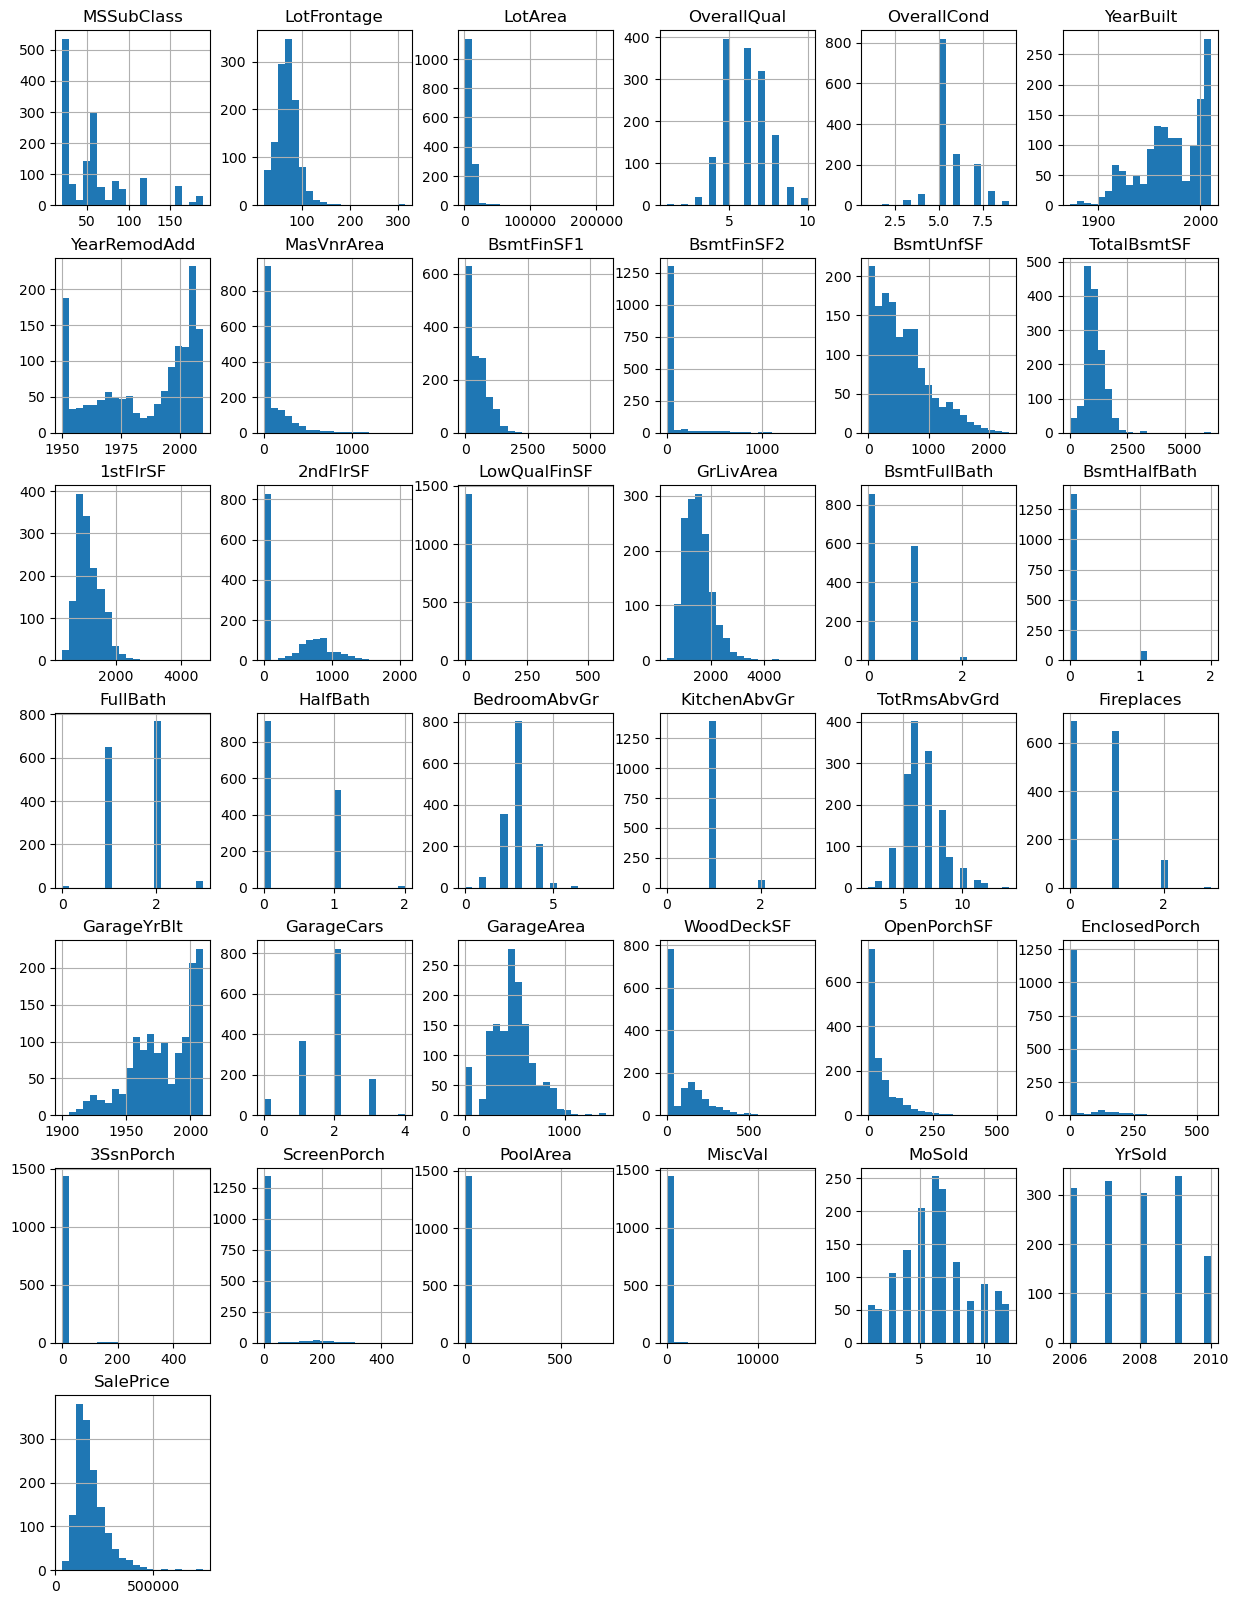

In [14]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
numerical_df.hist(figsize=(15, 20), bins=20)
plt.show()

# Data Preparation

## Remove unnecessary columns

In [15]:
# drop the 'Id' column form df
prices_df = prices_df.drop(columns = 'Id')
prices_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,

## Imputing numerical columns

replace NaN with mean values in numerical columns

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')

In [17]:
# Before we perform imputation, let's check the no. of missing values in each numeric column.
prices_df[numerical_columns_list_no_Y].isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [18]:
# Fit the Imputer with mean
imputer.fit(prices_df[numerical_columns_list_no_Y])

SimpleImputer()

In [19]:
# see the results
list(imputer.statistics_)

[56.897260273972606,
 70.04995836802665,
 10516.828082191782,
 6.0993150684931505,
 5.575342465753424,
 1971.267808219178,
 1984.8657534246574,
 103.68526170798899,
 443.6397260273973,
 46.54931506849315,
 567.2404109589041,
 1057.4294520547944,
 1162.626712328767,
 346.99246575342465,
 5.844520547945206,
 1515.463698630137,
 0.42534246575342466,
 0.057534246575342465,
 1.5650684931506849,
 0.38287671232876713,
 2.8664383561643834,
 1.0465753424657533,
 6.517808219178082,
 0.613013698630137,
 1978.5061638868744,
 1.7671232876712328,
 472.9801369863014,
 94.2445205479452,
 46.66027397260274,
 21.954109589041096,
 3.4095890410958902,
 15.060958904109588,
 2.758904109589041,
 43.489041095890414,
 6.321917808219178,
 2007.8157534246575]

In [20]:
# Impute the data in original df with mean
prices_df[numerical_columns_list_no_Y] = imputer.transform(prices_df[numerical_columns_list_no_Y])
# see the results
prices_df[numerical_columns_list_no_Y].isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

## Remove Outliers in Numerical columns

In [21]:
def remove_outliers_zscore(df, columns, threshold=3):
    """
    remove rows with outliers in specified numerical columns
    from provided pandas dataframe.
    Data with more than 3 or less than 3 std consider as outlier
    """
    z_scores = pd.DataFrame()

    # Calculate Z-scores for the specified columns
    for column in columns:
        mean = df[column].mean()
        std_dev = df[column].std()
        z_scores[column] = (df[column] - mean) / std_dev

    # Keep only the rows where all specified columns have Z-scores within the threshold
    df_clean = df[(z_scores.abs() <= threshold).all(axis=1)]

    return df_clean

In [22]:
filtered_df = remove_outliers_zscore(prices_df, numerical_columns_list_no_Y, threshold = 3)

In [23]:
filtered_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,NaN,Attchd,2003.000000,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,2008.0,WD,Normal,208500
2,60.0,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.000000,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,9.0,2008.0,WD,Normal,223500
4,60.0,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,TA,Attchd,2000.000000,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,12.0,2008.0,WD,Normal,250000
6,20.0,RL,75.0,10084.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8.0,5.0,2004.0,2005.0,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694.0,0.0,0.0,1694.0,1.0,0.0,2.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Attchd,2004.000000,RFn,2.0,636.0,TA,TA,Y,255.0,57.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,8.0,2007.0,WD,Normal,307000
10,20.0,RL,70.0,11200.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5.0,5.0,1965.0,1965.0,Hip,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,906.0,Unf,0.0,134.0,1040.0,GasA,Ex,Y,SBrkr,1040.0,0.0,0.0,1040.0,1.0,0.0,1.0,0.0,3.0,1.0,TA,5.0,Typ,0.0,NaN,Detchd,1965.000000,Unf,1.0,384.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,2008.0,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,180.0,RM,35.0,3675.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5.0,5.0,2005.0,2005.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547.0,Unf,0.0,0.0,547.0,GasA,Gd,Y,SBrkr,1072.0,0.0,0.0,1072.0,1.0,0.0,1.0,0.0,2.0,1.0,TA,5.0,Typ,0.0,NaN,Basment,2005.000000,Fin,2.0,525.0,TA,TA,Y,0.0,28.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,5.0,2006.0,WD,Normal,145000
1453,20.0,RL,90.0,17217.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5.0,5.0,2006.0,2006.0,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1140.0,1140.0,GasA,Ex,Y,SBrkr,1140.0,0.0,0.0,1140.0,0.0,0.0,1.0,0.0,3.0,1.0,TA,6.0,Typ,0.0,NaN,NaN,1978.506164,NaN,0.0,0.0,NaN,NaN,Y,36.0,56.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,7.0,2006.0,WD,Abnorml,84500
1454,20.0,FV,62.0,7500.0,Pave,Pave,Reg,Lvl,AllPub,Inside,G

## Scale Numerical Values

In [24]:
filtered_df[numerical_columns_list_no_Y].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000
mean,53.888345,67.618749,9166.571988,6.090108,5.518119,1975.294809,1986.162586,83.804894,417.556317,18.563173,582.228208,1018.347698,1103.692458,324.944172,0.286974,1428.923604,0.408423,0.0,1.555338,0.376102,2.787463,1.0,6.262488,0.548482,1980.791659,1.757101,466.926543,88.285994,42.525955,14.794319,0.022527,5.953967,0.0,14.695397,6.260529,2007.809011
std,40.280430,18.357266,3643.823663,1.331264,0.982651,29.064942,20.738687,130.292502,407.388467,75.433890,424.315153,366.334217,333.451242,409.009188,4.636272,436.359406,0.491783,0.0,0.522178,0.484643,0.699355,0.0,1.415479,0.591484,24.031796,0.713841,199.241935,107.134058,53.738625,43.004318,0.719805,28.743129,0.0,101.144074,2.680851,1.342283
min,20.000000,21.000000,1300.000000,2.000000,3.000000,1885.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.0,3.000000,0.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7200.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,253.000000,792.000000,859.000000,0.000000,0.000000,1092.000000,0.000000,0.0,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1964.000000,1.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.000000,2007.000000
50%,50.000000,70.049958,9084.000000,6.000000,5.000000,1977.000000,1996.000000,0.000000,387.000000,0.000000,501.000000,960.000000,1047.000000,0.000000,0.000000,1405.000000,0.000000,0.0,2.000000,0.000000,3.000000,1.0,6.000000,0.000000,1984.000000,2.000000,472.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.0,0.000000,6.000000,2008.000000
75%,60.000000,77.000000,11003.000000,7.000000,6.000000,2003.000000,2004.000000,146.000000,697.000000,0.000000,823.000000,1241.000000,1314.000000,703.000000,0.000000,1694.000000,1.000000,0.0,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,64.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,2009.000000
max,180.000000,134.000000,29959.000000,10.000000,8.000000,2009.000000,2010.000000,640.000000,1646.000000,506.000000,1869.000000,2158.000000,2207.000000,1427.000000,80.000000,2978.000000,1.000000,0.0,3.000000,1.000000,5.000000,1.0,11.000000,2.000000,2010.000000,4.000000,1053.000000,468.000000,244.000000,205.000000,23.000000,182.000000,0.0,1300.000000,12.000000,2010.000000


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(filtered_df[numerical_columns_list_no_Y])

MinMaxScaler()

In [26]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[20.0,
 21.0,
 1300.0,
 2.0,
 3.0,
 1885.0,
 1950.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 438.0,
 0.0,
 0.0,
 438.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 3.0,
 0.0,
 1910.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 2006.0]

In [27]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[180.0,
 134.0,
 29959.0,
 10.0,
 8.0,
 2009.0,
 2010.0,
 640.0,
 1646.0,
 506.0,
 1869.0,
 2158.0,
 2207.0,
 1427.0,
 80.0,
 2978.0,
 1.0,
 0.0,
 3.0,
 1.0,
 5.0,
 1.0,
 11.0,
 2.0,
 2010.0,
 4.0,
 1053.0,
 468.0,
 244.0,
 205.0,
 23.0,
 182.0,
 0.0,
 1300.0,
 12.0,
 2010.0]

In [28]:
filtered_df.loc[:, numerical_columns_list_no_Y] = scaler.transform(filtered_df[numerical_columns_list_no_Y])
filtered_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.25,RL,0.389381,0.249485,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.625,0.4,0.951613,0.883333,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.306250,Gd,TA,PConc,Gd,TA,No,GLQ,0.428919,Unf,0.000000,0.080257,0.396664,GasA,Ex,Y,SBrkr,0.236292,0.598458,0.0,0.500787,1.0,0.0,0.666667,1.0,0.50,0.0,Gd,0.625,Typ,0.0,NaN,Attchd,0.930000,RFn,0.50,0.520418,TA,TA,Y,0.000000,0.250000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.090909,0.50,WD,Normal,208500
2,0.25,RL,0.415929,0.347186,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.625,0.4,0.935484,0.866667,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.253125,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.295261,Unf,0.000000,0.232210,0.426321,GasA,Ex,Y,SBrkr,0.272470,0.606868,0.0,0.530709,1.0,0.0,0.666667,1.0,0.50,0.0,Gd,0.375,Typ,0.5,TA,Attchd,0.910000,RFn,0.50,0.577398,TA,TA,Y,0.000000,0.172131,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.727273,0.50,WD,Normal,223500
4,0.25,RL,0.557522,0.452214,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,0.750,0.4,0.927419,0.833333,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.546875,Gd,TA,PConc,Gd,TA,Av,GLQ,0.397934,Unf,0.000000,0.262172,0.530584,GasA,Ex,Y,SBrkr,0.399661,0.737912,0.0,0.692913,1.0,0.0,0.666667,1.0,0.75,0.0,Gd,0.750,Typ,0.5,TA,Attchd,0.900000,RFn,0.75,0.793922,TA,TA,Y,0.410256,0.344262,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.000000,0.50,WD,Normal,250000
6,0.00,RL,0.477876,0.306501,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,0.750,0.4,0.959677,0.916667,Gable,CompShg,VinylSd,VinylSd,Stone,0.290625,Gd,TA,PConc,Ex,TA,Av,GLQ,0.831713,Unf,0.000000,0.169609,0.781279,GasA,Ex,Y,SBrkr,0.710006,0.000000,0.0,0.494488,1.0,0.0,0.666667,0.0,0.50,0.0,Gd,0.500,Typ,0.5,Gd,Attchd,0.940000,RFn,0.50,0.603989,TA,TA,Y,0.544872,0.233607,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.636364,0.25,WD,Normal,307000
10,0.00,RL,0.433628,0.345441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,0.375,0.4,0.645161,0.250000,Hip,CompShg,HdBoard,HdBoard,NaN,0.000000,TA,TA,CBlock,TA,TA,No,Rec,0.550425,Unf,0.000000,0.071696,0.481928,GasA,Ex,Y,SBrkr,0.340305,0.000000,0.0,0.237008,1.0,0.0,0.333333,0.0,0.50,0.0,TA,0.250,Typ,0.0,NaN,Detchd,0.550000,Unf,0.25,0.364672,TA,TA,Y,0.000000,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.090909,0.50,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1.00,RM,0.123894,0.082871,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,0.375,0.4,0.967742,0.916667,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.125000,TA,TA,PConc,Gd,TA,Gd,GLQ,0.332321,Unf,0.000000,0.000000,0.253475,GasA,Gd,Y,SBrkr,0.358395,0.000000,0.0,0.249606,1.0,0.0,0.333333,0.0,0.25,0.0,TA,0.250,Typ,0.0,NaN,Basment,0.950000,Fin,0.50,0.498575,TA,TA,Y,0.000000,0.114754,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.363636,0.00,WD,Normal,145000
1453,0.00,RL,0.610619,0.555393,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,0.375,0.4,0.

In [29]:
filtered_df[numerical_columns_list_no_Y].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000
mean,0.211802,0.412555,0.274489,0.511263,0.503624,0.728184,0.602710,0.130945,0.253679,0.036686,0.311519,0.471894,0.376310,0.227711,0.003587,0.390127,0.408423,0.0,0.518446,0.376102,0.446866,0.0,0.407811,0.274241,0.707917,0.439275,0.443425,0.188645,0.174287,0.072167,0.000979,0.032714,0.0,0.011304,0.478230,0.452253
std,0.251753,0.162454,0.127144,0.166408,0.196530,0.234395,0.345645,0.203582,0.247502,0.149079,0.227028,0.169756,0.188497,0.286622,0.057953,0.171795,0.491783,0.0,0.174059,0.484643,0.174839,0.0,0.176935,0.295742,0.240318,0.178460,0.189214,0.228919,0.220240,0.209777,0.031296,0.157929,0.0,0.077803,0.243714,0.335571
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.345133,0.205869,0.375000,0.400000,0.572581,0.300000,0.000000,0.000000,0.000000,0.135367,0.367006,0.237988,0.000000,0.000000,0.257480,0.000000,0.0,0.333333,0.000000,0.250000,0.0,0.250000,0.000000,0.540000,0.250000,0.309592,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.272727,0.250000
50%,0.187500,0.434070,0.271608,0.500000,0.400000,0.741935,0.766667,0.000000,0.235115,0.000000,0.268058,0.444856,0.344262,0.000000,0.000000,0.380709,0.000000,0.0,0.666667,0.000000,0.500000,0.0,0.375000,0.000000,0.740000,0.500000,0.448243,0.000000,0.110656,0.000000,0.000000,0.000000,0.0,0.000000,0.454545,0.500000
75%,0.250000,0.495575,0.338567,0.625000,0.600000,0.951613,0.900000,0.228125,0.423451,0.000000,0.440342,0.575070,0.495195,0.492642,0.000000,0.494488,1.000000,0.0,0.666667,1.000000,0.500000,0.0,0.500000,0.500000,0.930000,0.500000,0.547009,0.358974,0.262295,0.000000,0.000000,0.000000,0.0,0.000000,0.636364,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


## Imputing Catgeorical columns

In [30]:
# Check for NaN values in filtered DataFrame
nan_counts_original = filtered_df.isna().sum()
print("NaN values in original DataFrame:")
print(nan_counts_original[nan_counts_original > 0])

NaN values in original DataFrame:
Alley            959
MasVnrType       608
BsmtQual          19
BsmtCond          19
BsmtExposure      20
BsmtFinType1      19
BsmtFinType2      19
Electrical         1
FireplaceQu      513
GarageType        46
GarageFinish      46
GarageQual        46
GarageCond        46
PoolQC          1021
Fence            830
MiscFeature      994
dtype: int64


replace NaN values with placeholder 'Unknown'

In [31]:
filtered_df.loc[:, categorical_columns_list] = filtered_df[categorical_columns_list].fillna("Unknown")

In [32]:
nan_counts_replaced = filtered_df[categorical_columns_list].isna().sum()
print("NaN values after replacement with 'Unknown':")
print(nan_counts_replaced[nan_counts_replaced > 0])

NaN values after replacement with 'Unknown':
Series([], dtype: int64)


## Encoding categorical values

In [33]:
filtered_df[categorical_columns_list].nunique()

MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         1
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        3
BldgType          5
HouseStyle        7
RoofStyle         5
RoofMatl          4
Exterior1st      13
Exterior2nd      15
MasVnrType        4
ExterQual         4
ExterCond         3
Foundation        6
BsmtQual          5
BsmtCond          4
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           5
HeatingQC         4
CentralAir        2
Electrical        5
KitchenQual       4
Functional        6
FireplaceQu       6
GarageType        6
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            1
Fence             5
MiscFeature       2
SaleType          9
SaleCondition     6
dtype: int64

In [34]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform ='pandas')
ohetransform = encoder.fit_transform(filtered_df[categorical_columns_list])

In [35]:
encoder.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['Grvl', 'Pave', 'Unknown'], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['AllPub'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Feedr', 'Norm', 'RRNn'], dtype=object),
 array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object),
 array(['1.5Fin', '1.5Unf', '1Story', '2.5Unf', '

In [36]:
encoded_columns_list = list(encoder.get_feature_names_out(categorical_columns_list))
print(encoded_columns_list)

['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave', 'Alley_Unknown', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_Ston

In [37]:
prices_df_encoded = pd.concat([filtered_df, ohetransform], axis = 1).drop(columns = categorical_columns_list)

In [38]:
prices_df_encoded

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_Unknown,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,FireplaceQu_TA,FireplaceQu_Unknown,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_Unknown,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unknown,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Unknown,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Unknown,MiscFeature_Shed,MiscFeature_Unknown,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.25,0.389381,0.249485,0.625,0.4,0.951613,0.883333,0.306250,0.428919,0.000000,0.080257,0.396664,0.236292,0.598458,0.0,0.500787,1.0,0.0,0.666667,1.0,0.50,0.0,0.625,0.0,0.930000,0.50,0.520418,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,208500,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.25,0.415929,0.347186,0.625,0.4,0.935484,0.866667,0.253125,0.295261,0.000000,0.232210,0.426321,0.272470,0.606868,0.0,0.530709,1.0,0.0,0.666667,1.0,0.50,0.0,0.375,0.5,0.910000,0.50,0.577398,0.000000,0.172131,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,223500,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.25,0.557522,0.452214,0.750,0.4,0.927419,0.833333,0.546875,0.397934,0.000000,0.262172,0.530584,0.399661,0.737912,0.0,0.692913,1.0,0.0,0.666667,1.0,0.75,0.0,0.750,0.5,0.900000,0.75,0.793922,0.410256,0.344262,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,250000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.00,0.477876,0.306501,0.750,0.4,0.959677,0.916667,0.290625,0.831713,0.000000,0.169609,0.781279,0.710006,0.000000,0.0,0.494488,1.0,0.0,0.666667,0.0,0.50,0.0,0.500,0.5,0.940000,0.50,0.603989,0.544872,0.233607,0.0,0.0,0.0,0.0,0.0,0.636364,0.25,307000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10,0.00,0.433628,0.345441,0.375,0.4,0.645161,0.250000,0.000000,0.550425,0.000000,0.071696,0.481928,0.340305,0.000000,0.0,0.237008,1.0,0.0,0.333333,0.0,0.50,0.0,0.250,0.0,0.550000,0.25,0.364672,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,129500,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [39]:
# Check for NaN values in the combined DataFrame
nan_counts_combined = filtered_df.isna().sum()
print("NaN values in the combined DataFrame:")
print(nan_counts_combined[nan_counts_combined > 0])

NaN values in the combined DataFrame:
Series([], dtype: int64)


## Selecting inputs and targets

In [40]:
prices_df_encoded

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_Unknown,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,FireplaceQu_TA,FireplaceQu_Unknown,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_Unknown,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unknown,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Unknown,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Unknown,MiscFeature_Shed,MiscFeature_Unknown,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.25,0.389381,0.249485,0.625,0.4,0.951613,0.883333,0.306250,0.428919,0.000000,0.080257,0.396664,0.236292,0.598458,0.0,0.500787,1.0,0.0,0.666667,1.0,0.50,0.0,0.625,0.0,0.930000,0.50,0.520418,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,208500,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.25,0.415929,0.347186,0.625,0.4,0.935484,0.866667,0.253125,0.295261,0.000000,0.232210,0.426321,0.272470,0.606868,0.0,0.530709,1.0,0.0,0.666667,1.0,0.50,0.0,0.375,0.5,0.910000,0.50,0.577398,0.000000,0.172131,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,223500,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.25,0.557522,0.452214,0.750,0.4,0.927419,0.833333,0.546875,0.397934,0.000000,0.262172,0.530584,0.399661,0.737912,0.0,0.692913,1.0,0.0,0.666667,1.0,0.75,0.0,0.750,0.5,0.900000,0.75,0.793922,0.410256,0.344262,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,250000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.00,0.477876,0.306501,0.750,0.4,0.959677,0.916667,0.290625,0.831713,0.000000,0.169609,0.781279,0.710006,0.000000,0.0,0.494488,1.0,0.0,0.666667,0.0,0.50,0.0,0.500,0.5,0.940000,0.50,0.603989,0.544872,0.233607,0.0,0.0,0.0,0.0,0.0,0.636364,0.25,307000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10,0.00,0.433628,0.345441,0.375,0.4,0.645161,0.250000,0.000000,0.550425,0.000000,0.071696,0.481928,0.340305,0.000000,0.0,0.237008,1.0,0.0,0.333333,0.0,0.50,0.0,0.250,0.0,0.550000,0.25,0.364672,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,129500,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [41]:
prices_df_encoded.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [42]:
target_col_list = 'SalePrice'

In [43]:
input_cols_list = list(prices_df_encoded.drop('SalePrice', axis=1).columns)
input_cols_list

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_Pave',
 'Alley_Unknown',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_

# Training and Validation Set

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(prices_df_encoded[input_cols_list], 
                                                                        prices_df_encoded[target_col_list], 
                                                                        test_size=0.25, 
                                                                        random_state=68)

In [46]:
train_inputs

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_Unknown,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,FireplaceQu_TA,FireplaceQu_Unknown,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_Unknown,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unknown,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Unknown,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Unknown,MiscFeature_Shed,MiscFeature_Unknown,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
179,0.0625,0.345133,0.251928,0.375,0.6,0.306452,0.933333,0.000000,0.000000,0.0,0.517924,0.448563,0.299604,0.000000,0.0,0.208661,0.0,0.0,0.333333,0.0,0.25,0.0,0.250,0.0,0.25,0.50,0.455840,0.000000,0.000000,0.897561,0.0,0.0,0.0,0.0,0.545455,0.25,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1280,0.0000,0.407080,0.296870,0.625,0.4,0.943548,0.866667,0.171875,0.478736,0.0,0.420011,0.728916,0.641605,0.000000,0.0,0.446850,1.0,0.0,0.666667,0.0,0.50,0.0,0.375,0.0,0.92,0.50,0.516619,0.000000,0.295082,0.000000,0.0,0.0,0.0,0.0,0.181818,0.75,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1060,0.6250,0.176991,0.126313,0.750,0.4,0.935484,0.850000,0.000000,0.374241,0.0,0.386303,0.620019,0.508762,0.000000,0.0,0.354331,1.0,0.0,0.666667,0.0,0.25,0.0,0.375,0.0,0.91,0.50,0.552707,0.000000,0.000000,0.829268,0.0,0.0,0.0,0.0,0.272727,1.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
927,0.2500,0.434070,0.300080,0.625,0.4,0.669355,0.300000,0.534375,0.335358,0.0,0.149813,0.385542,0.373092,0.616678,0.0,0.606299,0.0,0.0,0.666667,1.0,0.75,0.0,0.750,0.5,0.58,0.50,0.461538,0.000000,0.176230,0.000000,0.0,0.0,0.0,0.0,0.272727,0.50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
353,0.0625,0.345133,0.251928,0.500,1.0,0.346774,0.883333,0.000000,0.000000,0.0,0.333868,0.289157,0.159412,0.000000,0.0,0.111024,0.0,0.0,0.333333,0.0,0.25,0.0,0.250,0.0,0.95,0.50,0.459639,0.226496,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,1.00,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [47]:
train_targets

179     100000
1280    227000
1060    213500
927     176000
353     105900
         ...  
290     233230
1338    200000
609     118500
716     159500
1200    116050
Name: SalePrice, Length: 765, dtype: int64

In [48]:
val_inputs

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_Unknown,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,FireplaceQu_TA,FireplaceQu_Unknown,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_Unknown,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unknown,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Unknown,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Unknown,MiscFeature_Shed,MiscFeature_Unknown,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
63,0.31250,0.256637,0.314037,0.625,0.6,0.290323,0.000000,0.00000,0.000000,0.000000,0.308186,0.266914,0.262295,0.566223,0.0,0.500787,0.0,0.0,0.666667,0.0,0.50,0.0,0.750,0.0,0.80,0.50,0.455840,0.025641,0.045082,0.312195,0.0,0.0,0.0,0.0,0.272727,1.00,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
90,0.00000,0.345133,0.205869,0.250,0.4,0.524194,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.340305,0.000000,0.0,0.237008,0.0,0.0,0.333333,0.0,0.25,0.0,0.125,0.0,0.40,0.50,0.398860,0.000000,0.118852,0.000000,0.0,0.0,0.0,0.0,0.545455,0.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1401,0.25000,0.362832,0.213371,0.500,0.4,0.959677,0.900000,0.00000,0.461118,0.000000,0.042804,0.388786,0.240814,0.510862,0.0,0.454724,1.0,0.0,0.666667,1.0,0.50,0.0,0.625,0.5,0.94,0.50,0.377968,0.213675,0.307377,0.000000,0.0,0.0,0.0,0.0,0.272727,0.50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1001,0.06250,0.345133,0.143062,0.375,0.6,0.282258,0.000000,0.00000,0.000000,0.000000,0.369716,0.320204,0.143019,0.000000,0.0,0.099606,0.0,0.0,0.333333,0.0,0.25,0.0,0.125,0.0,0.10,0.25,0.205128,0.000000,0.081967,0.458537,0.0,0.0,0.0,0.0,0.000000,0.25,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
587,0.40625,0.469027,0.259604,0.375,0.6,0.782258,0.533333,0.00000,0.408262,0.000000,0.089888,0.389249,0.238553,0.000000,0.0,0.166142,1.0,0.0,0.333333,0.0,0.25,0.0,0.125,0.0,0.86,0.50,0.501425,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.545455,0.75,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [49]:
val_targets

63      140000
90      109900
1401    193000
1001     86000
587     137000
         ...  
682     173000
821      93000
223      97000
1310    335000
1005    149900
Name: SalePrice, Length: 256, dtype: int64

# Train a Linear Regression Model

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
# Create and train the model
model = LinearRegression()

In [52]:
model.fit(train_inputs, train_targets)

LinearRegression()

# Make Predictions and Evaluate the Model

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [54]:
train_preds = model.predict(train_inputs)
train_preds

array([112184., 207454., 223390., 178980.,  95586., 234718., 167974.,
       127412., 332136., 161738., 303096., 150022., 138878., 260430.,
       211906., 133300.,  99508., 263800., 154898., 153734., 225712.,
       188200., 174636.,  97908., 125984., 231596., 184258., 155426.,
       214226., 193398., 189090., 241532.,  96953., 131026., 191698.,
       208404.,  83368., 160772., 200887., 119348., 135328., 208228.,
       328822., 126122.,  93749.,  96186., 219500., 303636., 118634.,
       153362., 180354., 107021., 155238., 120572., 181124., 153680.,
       308380., 144894., 189910.,  83547., 159812., 142688., 112082.,
       197948., 292244., 164046., 156342., 185654., 140440., 145841.,
       226838., 113206., 241998., 122296., 169982., 140736., 232512.,
       104388., 259655., 144876., 132778., 192478.,  89184.,  99702.,
       336916., 151728., 196346., 278548., 123638., 176832., 194500.,
       164634., 197197., 221424., 111032., 113297., 153719., 231020.,
        81904., 2315

In [55]:
train_mse = mean_squared_error(train_targets, train_preds)
print('The MSE loss for the training set is {}.'.format(train_mse))
train_r2 = r2_score(train_targets, train_preds)
print('The R2 for the training set is {}.'.format(train_r2))

The MSE loss for the training set is 215075294.4248366.
The R2 for the training set is 0.9515545035347682.


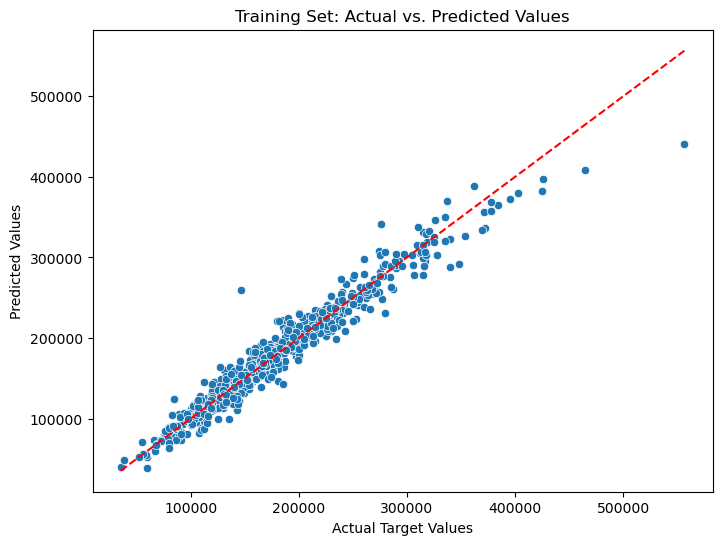

In [56]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_targets, y=train_preds)
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Values')
plt.title('Training Set: Actual vs. Predicted Values')
plt.plot([min(train_targets), max(train_targets)], [min(train_targets), max(train_targets)], color='red', linestyle='--')
plt.show()

In [57]:
val_preds = model.predict(val_inputs)
val_preds

array([ 1.12460000e+05,  1.26444000e+05,  1.90702000e+05,  8.26740000e+04,
        1.27534000e+05,  2.81552000e+05,  1.15441000e+05,  2.42394000e+05,
        1.19504000e+05,  2.83934794e+14,  1.05796000e+05,  2.93716000e+05,
        1.20724000e+05,  1.50890000e+05,  1.39026000e+05,  1.58668000e+05,
        7.06280000e+04,  2.79946000e+05,  1.46692000e+05,  1.24948000e+05,
        2.75068000e+05,  1.33942000e+05,  9.68240000e+04,  1.41202000e+05,
        2.83934794e+14,  1.85496000e+05,  1.90196000e+05,  9.17400000e+04,
        1.48896000e+05, -9.76305826e+14,  1.06791000e+05,  1.27264000e+05,
        8.68040000e+04,  2.26376000e+05,  2.01016000e+05,  1.30014000e+05,
        1.58318000e+05,  1.32210000e+05,  9.66440000e+04,  2.39600000e+05,
        2.66568000e+05,  2.99356000e+05,  1.05696000e+05,  1.13929000e+05,
        6.99070000e+04,  2.39842000e+05,  1.81636000e+05,  1.76740000e+05,
        1.86758000e+05,  4.09392000e+05,  1.10169000e+05,  1.28992000e+05,
        1.41544000e+05,  

In [58]:
val_targets

63      140000
90      109900
1401    193000
1001     86000
587     137000
         ...  
682     173000
821      93000
223      97000
1310    335000
1005    149900
Name: SalePrice, Length: 256, dtype: int64

In [59]:
val_mse = mean_squared_error(val_targets, val_preds)
print('The MSE loss for the validation set is {}.'.format(val_mse))
val_r2 = r2_score(val_targets, val_preds)
print('The R2 for the validation set is {}.'.format(val_r2))

The MSE loss for the validation set is 1.183905334576231e+28.
The R2 for the validation set is -2.5305984981319096e+18.


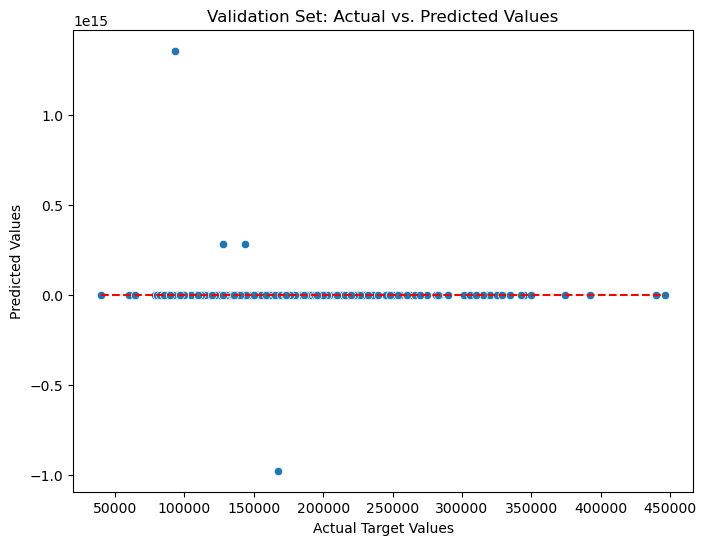

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=val_targets, y=val_preds)
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Values')
plt.title('Validation Set: Actual vs. Predicted Values')
plt.plot([min(val_targets), max(val_targets)], [min(val_targets), max(val_targets)], color='red', linestyle='--')
plt.show()

Seems like our model perform good at training set, and very poorly on validation set, so its **overfitting** to training data. We will need to reduce overfitting later

# Model Tuning

## Correlation Analysis

### Multicollinearity Check

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [62]:
def calculate_vif(df):
    """
    Calculate VIF for each feature in the DataFrame and return DataFrame with VIF values for each feature
    """
    df_with_const = add_constant(df) #new df with constant term (intercept)
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = df_with_const.columns
    
    vif_values = []
    
    for i in range(df_with_const.shape[1]):
        vif = variance_inflation_factor(df_with_const.values, i)  # Calculate VIF
        vif_values.append(vif)  # Append VIF value to the list
    vif_data["VIF"] = vif_values
    
    return vif_data

In [63]:
def remove_multicollinearity(df, threshold=10):
    """
    Removes features from df with high multicollinearity based on VIF value.
    """
    df_reduced = df.copy()  # Create a copy of the DataFrame
    df_with_const = add_constant(df_reduced)
    vif_data = calculate_vif(df_with_const)
    
    while vif_data["VIF"].max() > threshold:
        # Drop feature with the highest VIF
        feature_to_drop = vif_data.sort_values("VIF", ascending=False).iloc[0]["feature"]
        df_reduced = df_reduced.drop(columns=[feature_to_drop])
        df_with_const = add_constant(df_reduced)
        vif_data = calculate_vif(df_with_const)
    
    return df_reduced

In [64]:
prices_df_encoded_features = prices_df_encoded.drop(columns=['SalePrice'])
prices_df_encoded_target = prices_df_encoded['SalePrice']

prices_df_encoded_features_no_multicoll = remove_multicollinearity(prices_df_encoded_features, threshold=10)

D:\conda\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
D:\conda\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
D:\conda\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
D:\conda\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
D:\conda\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
D:\conda\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self

In [65]:
prices_df_encoded_features_no_multicoll

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,1stFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LandContour_Bnk,LandContour_HLS,LandContour_Low,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,...,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseP,Electrical_SBrkr,Electrical_Unknown,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,Functional_Maj1,Functional_Min1,Functional_Min2,Functional_Mod,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_Unknown,PavedDrive_P,PavedDrive_Y,PoolQC_Unknown,Fence_GdPrv,Fence_MnPrv,Fence_MnWw,Fence_Unknown,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family
0,0.389381,0.249485,0.625,0.4,0.883333,0.306250,0.000000,0.080257,0.236292,1.0,0.0,0.666667,1.0,0.50,0.0,0.625,0.0,0.930000,0.50,0.520418,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.415929,0.347186,0.625,0.4,0.866667,0.253125,0.000000,0.232210,0.272470,1.0,0.0,0.666667,1.0,0.50,0.0,0.375,0.5,0.910000,0.50,0.577398,0.000000,0.172131,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.557522,0.452214,0.750,0.4,0.833333,0.546875,0.000000,0.262172,0.399661,1.0,0.0,0.666667,1.0,0.75,0.0,0.750,0.5,0.900000,0.75,0.793922,0.410256,0.344262,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.477876,0.306501,0.750,0.4,0.916667,0.290625,0.000000,0.169609,0.710006,1.0,0.0,0.666667,0.0,0.50,0.0,0.500,0.5,0.940000,0.50,0.603989,0.544872,0.233607,0.0,0.0,0.0,0.0,0.0,0.636364,0.25,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10,0.433628,0.345441,0.375,0.4,0.250000,0.000000,0.000000,0.071696,0.340305,1.0,0.0,0.333333,0.0,0.50,0.0,0.250,0.0,0.550000,0.25,0.364672,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

### Correlation Analysis

In [66]:
prices_df_encoded_features_no_multicoll['SalePrice']=prices_df_encoded_target
prices_df_encoded_features_no_multicoll

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,1stFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LandContour_Bnk,LandContour_HLS,LandContour_Low,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,...,CentralAir_Y,Electrical_FuseA,Electrical_FuseP,Electrical_SBrkr,Electrical_Unknown,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,Functional_Maj1,Functional_Min1,Functional_Min2,Functional_Mod,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_Unknown,PavedDrive_P,PavedDrive_Y,PoolQC_Unknown,Fence_GdPrv,Fence_MnPrv,Fence_MnWw,Fence_Unknown,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SalePrice
0,0.389381,0.249485,0.625,0.4,0.883333,0.306250,0.000000,0.080257,0.236292,1.0,0.0,0.666667,1.0,0.50,0.0,0.625,0.0,0.930000,0.50,0.520418,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,208500
2,0.415929,0.347186,0.625,0.4,0.866667,0.253125,0.000000,0.232210,0.272470,1.0,0.0,0.666667,1.0,0.50,0.0,0.375,0.5,0.910000,0.50,0.577398,0.000000,0.172131,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,223500
4,0.557522,0.452214,0.750,0.4,0.833333,0.546875,0.000000,0.262172,0.399661,1.0,0.0,0.666667,1.0,0.75,0.0,0.750,0.5,0.900000,0.75,0.793922,0.410256,0.344262,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,250000
6,0.477876,0.306501,0.750,0.4,0.916667,0.290625,0.000000,0.169609,0.710006,1.0,0.0,0.666667,0.0,0.50,0.0,0.500,0.5,0.940000,0.50,0.603989,0.544872,0.233607,0.0,0.0,0.0,0.0,0.0,0.636364,0.25,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,307000
10,0.433628,0.345441,0.375,0.4,0.250000,0.000000,0.000000,0.071696,0.340305,1.0,0.0,0.333333,0.0,0.50,0.0,0.250,0.0,0.550000,0.25,0.364672,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [67]:
correlation_matrix = prices_df_encoded_features_no_multicoll.corr()
print(correlation_matrix['SalePrice'].sort_values(ascending=False))

SalePrice           1.000000
OverallQual         0.811464
GarageCars          0.695579
GarageArea          0.673847
FullBath            0.665525
                      ...   
BsmtHalfBath             NaN
KitchenAbvGr             NaN
PoolArea                 NaN
Utilities_AllPub         NaN
PoolQC_Unknown           NaN
Name: SalePrice, Length: 201, dtype: float64


Lets remove all features that has correlation < 0.4

In [68]:
sale_price_corr = correlation_matrix['SalePrice']
high_corr_features = sale_price_corr[sale_price_corr.abs() >= 0.5].index
print("Features with correlation >= 0.5:{}".format(high_corr_features))

Features with correlation >= 0.5:Index(['OverallQual', 'YearRemodAdd', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'ExterQual_Gd',
       'BsmtQual_Ex', 'BsmtQual_TA', 'SalePrice'],
      dtype='object')


In [69]:
prices_df_filtered_new = prices_df_encoded_features_no_multicoll[high_corr_features]
prices_df_filtered_new

,OverallQual,YearRemodAdd,1stFlrSF,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,ExterQual_Gd,BsmtQual_Ex,BsmtQual_TA,SalePrice
0,0.625,0.883333,0.236292,0.666667,0.625,0.930000,0.50,0.520418,1.0,0.0,0.0,208500
2,0.625,0.866667,0.272470,0.666667,0.375,0.910000,0.50,0.577398,1.0,0.0,0.0,223500
4,0.750,0.833333,0.399661,0.666667,0.750,0.900000,0.75,0.793922,1.0,0.0,0.0,250000
6,0.750,0.916667,0.710006,0.666667,0.500,0.940000,0.50,0.603989,1.0,1.0,0.0,307000
10,0.375,0.250000,0.340305,0.333333,0.250,0.550000,0.25,0.364672,0.0,0.0,1.0,129500
...,...,...,...,...,...,...,...,...,...,...,...,...
1452,0.375,0.916667,0.358395,0.333333,0.250,0.950000,0.50,0.498575,0.0,0.0,0.0,145000
1453,0.375,0.933333,0.396834,0.333333,0.375,0.685062,0.00,0.000000,0.0,0.0,0.0,84500
1454,0.625,0.916667,0.442623,0.666667,0.375,0.940000,0.50,0.379867,1.0,0.0,0.0,185000
1455,0.500,0.833333,0.291125,0.666667,0.500,0.890000,0.50,0.436847,0.0,0.0,0.0,175000


## Feature selection (Using Recursive Feature Elimination with Cross-Validation)

In [71]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

prices_df_filtered_new_features_df = prices_df_filtered_new.drop(columns=['SalePrice'])
prices_df_filtered_new_target = prices_df_filtered_new['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(prices_df_filtered_new_features_df, 
                                                  prices_df_filtered_new_target, 
                                                  test_size=0.25, 
                                                  random_state=68)

new_model = LinearRegression()

selector = RFE(new_model, n_features_to_select=6)
selector = selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.support_]
print("Selected Features:", selected_features.tolist())

X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores:", -cv_scores)  # MSE is negative because we used 'neg_mean_squared_error'
print("Mean Cross-Validation Score:", -cv_scores.mean())

Selected Features: ['OverallQual', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'GarageArea', 'BsmtQual_Ex']
Cross-Validation Scores: [8.21943453e+08 8.14496628e+08 6.79707706e+08 7.05496573e+08
 8.49213351e+08]
Mean Cross-Validation Score: 774171542.3502108


In [72]:
final_prices_df = prices_df_filtered_new[selected_features.tolist()]
final_prices_df.loc[:, 'SalePrice'] = prices_df_filtered_new_target.values
final_prices_df

C:\Users\user\AppData\Local\Temp\ipykernel_13672\815947472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_prices_df.loc[:, 'SalePrice'] = prices_df_filtered_new_target.values


,OverallQual,1stFlrSF,FullBath,TotRmsAbvGrd,GarageArea,BsmtQual_Ex,SalePrice
0,0.625,0.236292,0.666667,0.625,0.520418,0.0,208500
2,0.625,0.272470,0.666667,0.375,0.577398,0.0,223500
4,0.750,0.399661,0.666667,0.750,0.793922,0.0,250000
6,0.750,0.710006,0.666667,0.500,0.603989,1.0,307000
10,0.375,0.340305,0.333333,0.250,0.364672,0.0,129500
...,...,...,...,...,...,...,...
1452,0.375,0.358395,0.333333,0.250,0.498575,0.0,145000
1453,0.375,0.396834,0.333333,0.375,0.000000,0.0,84500
1454,0.625,0.442623,0.666667,0.375,0.379867,0.0,185000
1455,0.500,0.291125,0.666667,0.500,0.436847,0.0,175000


# Make Predictions and Evaluate the final Model

## Train Validation Split

In [73]:
final_inputs = final_prices_df.drop(['SalePrice'], axis=1).columns.tolist()

final_train_inputs, final_val_inputs, final_train_targets, final_val_targets = train_test_split(final_prices_df[final_inputs], 
                                                                        final_prices_df[target_col_list], 
                                                                        test_size=0.25, 
                                                                        random_state=68)

In [74]:
final_train_inputs

,OverallQual,1stFlrSF,FullBath,TotRmsAbvGrd,GarageArea,BsmtQual_Ex
179,0.375,0.299604,0.333333,0.250,0.455840,0.0
1280,0.625,0.641605,0.666667,0.375,0.516619,0.0
1060,0.750,0.508762,0.666667,0.375,0.552707,0.0
927,0.625,0.373092,0.666667,0.750,0.461538,0.0
353,0.500,0.159412,0.333333,0.250,0.459639,0.0
...,...,...,...,...,...,...
290,0.750,0.362352,0.666667,0.625,0.650522,0.0
1338,0.625,0.272470,0.666667,0.625,0.467236,0.0
609,0.250,0.334087,0.333333,0.250,0.247863,0.0
716,0.625,0.643301,0.333333,0.625,0.668566,0.0


In [75]:
final_train_targets

179     100000
1280    227000
1060    213500
927     176000
353     105900
         ...  
290     233230
1338    200000
609     118500
716     159500
1200    116050
Name: SalePrice, Length: 765, dtype: int64

In [76]:
final_val_inputs

,OverallQual,1stFlrSF,FullBath,TotRmsAbvGrd,GarageArea,BsmtQual_Ex
63,0.625,0.262295,0.666667,0.750,0.455840,0.0
90,0.250,0.340305,0.333333,0.125,0.398860,0.0
1401,0.500,0.240814,0.666667,0.625,0.377968,0.0
1001,0.375,0.143019,0.333333,0.125,0.205128,0.0
587,0.375,0.238553,0.333333,0.125,0.501425,0.0
...,...,...,...,...,...,...
682,0.500,0.482193,0.333333,0.375,0.409307,0.0
821,0.250,0.281515,0.333333,0.125,0.547009,0.0
223,0.250,0.240814,0.333333,0.125,0.547009,0.0
1310,0.625,0.827586,0.666667,0.500,0.538462,0.0


In [77]:
final_val_targets

63      140000
90      109900
1401    193000
1001     86000
587     137000
         ...  
682     173000
821      93000
223      97000
1310    335000
1005    149900
Name: SalePrice, Length: 256, dtype: int64

## Initializing the Final Model

In [78]:
# Create and train the model
final_model = LinearRegression()
final_model.fit(final_train_inputs, final_train_targets)

LinearRegression()

## Evaluating the Final Model

In [79]:
final_train_preds = final_model.predict(final_train_inputs)
final_train_preds

array([126887.43272407, 211664.4296709 , 225453.15699379, 220458.1300733 ,
       138204.04164881, 226004.75727122, 157178.94378514, 151666.8093863 ,
       338678.16240329, 175493.18127188, 277193.19626378, 165740.80692372,
       138572.42770221, 258058.36072574, 207812.96990107, 133082.95632296,
        91971.6279876 , 271812.79173842, 141660.40381358, 148004.60375557,
       190602.92386142, 197686.85771759, 188757.1849025 , 120519.3004717 ,
       124020.62659366, 228535.7080101 , 177081.81825041, 122905.75642266,
       201248.79363381, 203203.10019867, 217949.88116125, 210513.51917261,
       107216.81786921, 139759.27571707, 194429.30577428, 208180.51029948,
       102496.24380244, 160773.95552143, 208180.51029948, 127171.56849185,
       129260.1633666 , 192266.28157317, 316727.48809887, 127119.93537579,
       100514.62144184,  85326.74228213, 159697.33171224, 259852.82956155,
       115789.39869875, 173282.77733734, 173329.23821031, 144821.3113028 ,
       174790.42649421, 1

In [80]:
final_train_mse = mean_squared_error(final_train_targets, final_train_preds)
print('The MSE loss for the training set is {}.'.format(final_train_mse))
final_train_r2 = r2_score(final_train_targets, final_train_preds)
print('The R2 for the training set is {}.'.format(final_train_r2))

The MSE loss for the training set is 748128416.108607.
The R2 for the training set is 0.831484817282.


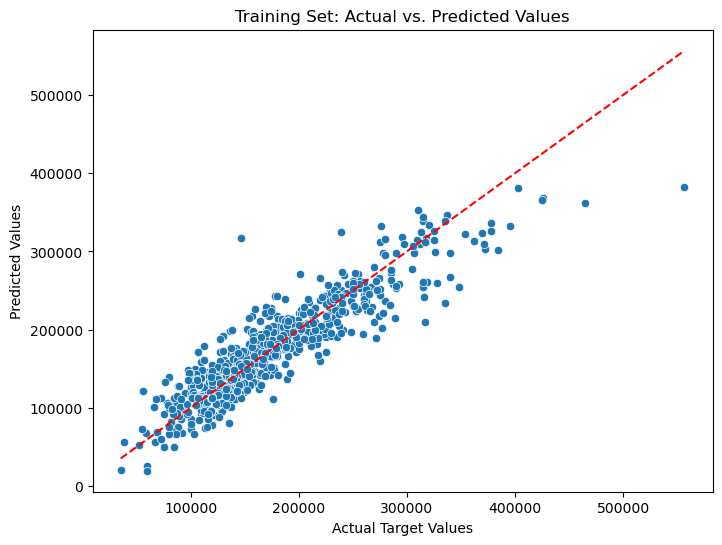

In [81]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=final_train_targets, y=final_train_preds)
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Values')
plt.title('Training Set: Actual vs. Predicted Values')
plt.plot([min(final_train_targets), max(final_train_targets)], [min(final_train_targets), max(final_train_targets)], color='red', linestyle='--')
plt.show()

In [82]:
final_val_preds = final_model.predict(final_val_inputs)
final_val_preds

array([213720.01703988,  97222.32630627, 179150.32228206,  92716.88214559,
       117019.2913855 , 236431.82167334, 154432.81257227, 183446.72667844,
       115615.06086064, 156997.17921913,  87262.15395859, 308796.43794156,
       123031.55051206, 170261.98202603, 172141.33850838, 132654.45510231,
        49322.71475523, 250142.68715033, 183691.91464904, 129263.45099791,
       238395.47618628, 144619.63742703, 113837.99013431, 191410.17549944,
       156997.17921913, 154919.83030312, 190797.08362865, 117234.24138864,
       186993.18519655, 147300.94217908,  92751.0076949 , 122848.15388174,
       117234.24138864, 174560.85814681, 205093.62088989, 139375.49830897,
       152004.80137647, 140891.03581188, 121606.9923312 , 219301.43501524,
       226816.85516862, 262384.14276946, 163247.11287638, 143325.35498671,
       105388.48795984, 212934.2939747 , 175823.75337719, 187609.76714251,
       196635.08016513, 360248.91021341, 145788.94552357, 128390.32217378,
       124012.594028  , 2

In [83]:
final_val_targets

63      140000
90      109900
1401    193000
1001     86000
587     137000
         ...  
682     173000
821      93000
223      97000
1310    335000
1005    149900
Name: SalePrice, Length: 256, dtype: int64

In [84]:
final_val_mse = mean_squared_error(final_val_targets, final_val_preds)
print('The MSE loss for the validation set is {}.'.format(final_val_mse))
final_val_r2 = r2_score(final_val_targets, final_val_preds)
print('The R2 for the validation set is {}.'.format(final_val_r2))

The MSE loss for the validation set is 905743820.7063588.
The R2 for the validation set is 0.8063971936411455.


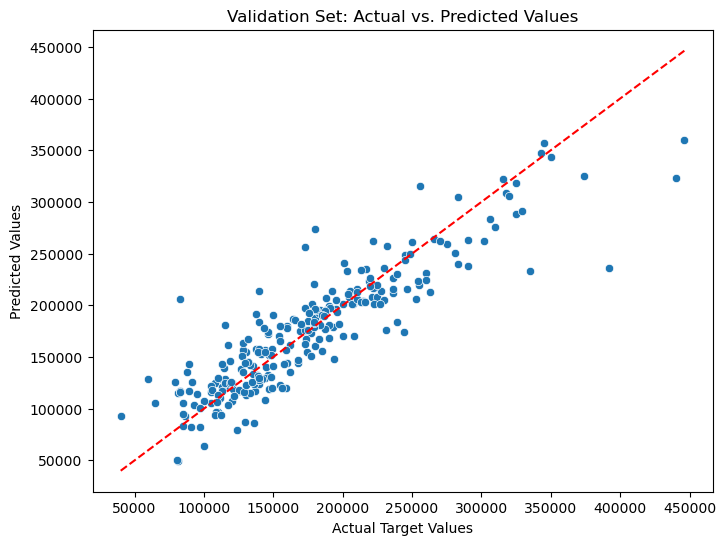

In [85]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=final_val_targets, y=final_val_preds)
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Values')
plt.title('Validation Set: Actual vs. Predicted Values')
plt.plot([min(final_val_targets), max(final_val_targets)], [min(final_val_targets), max(final_val_targets)], color='red', linestyle='--')
plt.show()

Now we good! lets evaluate our model on a test set

# Making Predictions on the Test Set

## Download test set

In [86]:
test_csv_path = extraction_directory + '/test.csv'
test_csv_path

'Predicting-House-Price-with-Linear-Regression-Model/test.csv'

In [87]:
test_df = pd.read_csv(test_csv_path)
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,Hd

## Preprocessing Data

We need to apply same preprocessing steps to a test set

### Remove unnecessary columns

In [88]:
test_df = test_df.drop(columns = 'Id')
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0

### Imputing numerical columns

In [89]:
test_df[numerical_columns_list_no_Y] = imputer.transform(test_df[numerical_columns_list_no_Y])

### Remove Outliers in Numerical columns

We need to remove same rows that we deleted in train df

In [90]:
removed_indices = set(test_df.index) - set(final_prices_df.index)
removed_indices

{1,
 3,
 5,
 7,
 8,
 9,
 17,
 24,
 26,
 28,
 33,
 37,
 39,
 41,
 46,
 48,
 50,
 51,
 52,
 53,
 55,
 58,
 64,
 70,
 72,
 74,
 78,
 80,
 88,
 93,
 102,
 104,
 105,
 113,
 115,
 116,
 118,
 120,
 125,
 129,
 137,
 144,
 153,
 154,
 159,
 161,
 165,
 166,
 169,
 170,
 171,
 176,
 178,
 182,
 185,
 187,
 188,
 189,
 191,
 196,
 197,
 198,
 201,
 205,
 213,
 215,
 218,
 224,
 231,
 233,
 237,
 241,
 245,
 246,
 249,
 250,
 251,
 253,
 258,
 260,
 263,
 267,
 271,
 273,
 277,
 278,
 280,
 289,
 291,
 293,
 297,
 298,
 299,
 300,
 304,
 306,
 309,
 312,
 313,
 314,
 322,
 325,
 326,
 328,
 330,
 332,
 335,
 339,
 342,
 343,
 346,
 349,
 351,
 352,
 355,
 357,
 358,
 359,
 360,
 365,
 366,
 367,
 375,
 378,
 380,
 384,
 398,
 400,
 403,
 406,
 411,
 414,
 420,
 421,
 426,
 440,
 441,
 446,
 451,
 454,
 457,
 459,
 461,
 462,
 470,
 471,
 475,
 477,
 480,
 488,
 493,
 495,
 496,
 499,
 504,
 505,
 508,
 510,
 517,
 519,
 520,
 523,
 529,
 533,
 535,
 539,
 542,
 546,
 548,
 550,
 558,
 570,
 574

In [91]:
test_df_cleaned = test_df.drop(index=removed_indices)
test_df_cleaned

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20.0,RH,80.000000,11622.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5.0,6.0,1961.0,1961.0,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,TA,5.0,Typ,0.0,NaN,Attchd,1961.000000,Unf,1.0,730.0,TA,TA,Y,140.0,0.0,0.0,0.0,120.0,0.0,NaN,MnPrv,NaN,0.0,6.0,2010.0,WD,Normal
2,60.0,RL,74.000000,13830.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5.0,5.0,1997.0,1998.0,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1997.000000,Fin,2.0,482.0,TA,TA,Y,212.0,34.0,0.0,0.0,0.0,0.0,NaN,MnPrv,NaN,0.0,3.0,2010.0,WD,Normal
4,120.0,RL,43.000000,5005.0,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8.0,5.0,1992.0,1992.0,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280.0,0.0,0.0,1280.0,0.0,0.0,2.0,0.0,2.0,1.0,Gd,5.0,Typ,0.0,NaN,Attchd,1992.000000,RFn,2.0,506.0,TA,TA,Y,0.0,82.0,0.0,0.0,144.0,0.0,NaN,NaN,NaN,0.0,1.0,2010.0,WD,Normal
6,20.0,RL,70.049958,7980.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6.0,7.0,1992.0,2007.0,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187.0,0.0,0.0,1187.0,1.0,0.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,0.0,NaN,Attchd,1992.000000,Fin,2.0,420.0,TA,TA,Y,483.0,21.0,0.0,0.0,0.0,0.0,NaN,GdPrv,Shed,500.0,3.0,2010.0,WD,Normal
10,120.0,RH,26.000000,5858.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,TwnhsE,1Story,7.0,5.0,1999.0,1999.0,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1051.0,BLQ,0.0,354.0,1405.0,GasA,Ex,Y,SBrkr,1337.0,0.0,0.0,1337.0,1.0,0.0,2.0,0.0,2.0,1.0,Gd,5.0,Typ,1.0,Fa,Attchd,1999.000000,Fin,2.0,511.0,TA,TA,Y,203.0,68.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,6.0,2010.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,160.0,RM,21.000000,1533.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4.0,5.0,1970.0,1970.0,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,408.0,Unf,0.0,138.0,546.0,GasA,TA,Y,SBrkr,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,TA,5.0,Typ,0.0,NaN,CarPort,1970.000000,Unf,1.0,286.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,12.0,2006.0,WD,Abnorml
1453,160.0,RM,21.000000,1526.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4.0,5.0,1970.0,1970.0,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,TA,Y,SBrkr,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,TA,5.0,Typ,0.0,NaN,NaN,1978.506164,NaN,0.0,0.0,NaN,NaN,Y,0.0,34.0,0.0,0.0,0.0,0.0,NaN,GdPrv,NaN,0.0,6.0,2006.0,WD,Normal
1454,160.0,RM,21.000000,1936.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twn

### Scale Numerical Values

In [92]:
test_df_cleaned.loc[:, numerical_columns_list_no_Y] = scaler.transform(test_df_cleaned[numerical_columns_list_no_Y])
test_df_cleaned

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000,RH,0.522124,0.360166,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,0.375,0.6,0.612903,0.183333,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,0.284326,LwQ,0.284585,0.144462,0.408712,GasA,TA,Y,SBrkr,0.258903,0.000000,0.0,0.180315,0.0,0.0,0.333333,0.0,0.25,0.0,TA,0.250,Typ,0.0,NaN,Attchd,0.510000,Unf,0.25,0.693257,TA,TA,Y,0.299145,0.000000,0.0,0.0,0.659341,0.0,NaN,MnPrv,NaN,0.000000,0.454545,1.0,WD,Normal
2,0.250,RL,0.469027,0.437210,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,0.375,0.4,0.903226,0.800000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,0.480559,Unf,0.000000,0.073301,0.430028,GasA,Gd,Y,SBrkr,0.276993,0.491240,0.0,0.468898,0.0,0.0,0.666667,1.0,0.50,0.0,TA,0.375,Typ,0.5,TA,Attchd,0.870000,Fin,0.50,0.457740,TA,TA,Y,0.452991,0.139344,0.0,0.0,0.000000,0.0,NaN,MnPrv,NaN,0.000000,0.181818,1.0,WD,Normal
4,0.625,RL,0.194690,0.129279,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,0.750,0.4,0.862903,0.700000,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,0.159781,Unf,0.000000,0.544141,0.593142,GasA,Ex,Y,SBrkr,0.475975,0.000000,0.0,0.331496,0.0,0.0,0.666667,0.0,0.25,0.0,Gd,0.250,Typ,0.0,NaN,Attchd,0.820000,RFn,0.50,0.480532,TA,TA,Y,0.000000,0.336066,0.0,0.0,0.791209,0.0,NaN,NaN,NaN,0.000000,0.000000,1.0,WD,Normal
6,0.000,RL,0.434070,0.233086,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,0.500,0.8,0.862903,0.950000,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,0.568044,Unf,0.000000,0.124666,0.541242,GasA,Ex,Y,SBrkr,0.423403,0.000000,0.0,0.294882,1.0,0.0,0.666667,0.0,0.50,0.0,TA,0.375,Typ,0.0,NaN,Attchd,0.820000,Fin,0.50,0.398860,TA,TA,Y,1.032051,0.086066,0.0,0.0,0.000000,0.0,NaN,GdPrv,Shed,0.384615,0.181818,1.0,WD,Normal
10,0.625,RH,0.044248,0.159043,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,TwnhsE,1Story,0.625,0.4,0.919355,0.816667,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,0.638518,BLQ,0.000000,0.189406,0.651066,GasA,Ex,Y,SBrkr,0.508197,0.000000,0.0,0.353937,1.0,0.0,0.666667,0.0,0.25,0.0,Gd,0.250,Typ,0.5,Fa,Attchd,0.890000,Fin,0.50,0.485280,TA,TA,Y,0.433761,0.278689,0.0,0.0,0.000000,0.0,NaN,NaN,NaN,0.000000,0.454545,1.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,0.875,RM,0.000000,0.008130,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,0.250,0.4,0.685484,0.333333,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,0.247874,Unf,0.000000,0.073836,0.253012,GasA,TA,Y,SBrkr,0.061051,0.382621,0.0,0.257480,0.0,0.0,0.333333,1.0,0.50,0.0,TA,0.250,Typ,0.0,NaN,CarPort,0.600000,Unf,0.25,0.271605,TA,TA,Y,0.000000,0.000000,0.0,0.0,0.000000,0.0,NaN,NaN,NaN,0.000000,1.000000,0.0,WD,Abnorml
1453,0.875,RM,0.000000,0.007886,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,0.250,0.4,0.685484,0.333333,Gable,CompS

### Imputing Catgeorical columns

In [93]:
test_df_cleaned.loc[:, categorical_columns_list] = test_df_cleaned[categorical_columns_list].fillna("Unknown")
test_df_cleaned

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000,RH,0.522124,0.360166,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,0.375,0.6,0.612903,0.183333,Gable,CompShg,VinylSd,VinylSd,Unknown,0.0,TA,TA,CBlock,TA,TA,No,Rec,0.284326,LwQ,0.284585,0.144462,0.408712,GasA,TA,Y,SBrkr,0.258903,0.000000,0.0,0.180315,0.0,0.0,0.333333,0.0,0.25,0.0,TA,0.250,Typ,0.0,Unknown,Attchd,0.510000,Unf,0.25,0.693257,TA,TA,Y,0.299145,0.000000,0.0,0.0,0.659341,0.0,Unknown,MnPrv,Unknown,0.000000,0.454545,1.0,WD,Normal
2,0.250,RL,0.469027,0.437210,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,0.375,0.4,0.903226,0.800000,Gable,CompShg,VinylSd,VinylSd,Unknown,0.0,TA,TA,PConc,Gd,TA,No,GLQ,0.480559,Unf,0.000000,0.073301,0.430028,GasA,Gd,Y,SBrkr,0.276993,0.491240,0.0,0.468898,0.0,0.0,0.666667,1.0,0.50,0.0,TA,0.375,Typ,0.5,TA,Attchd,0.870000,Fin,0.50,0.457740,TA,TA,Y,0.452991,0.139344,0.0,0.0,0.000000,0.0,Unknown,MnPrv,Unknown,0.000000,0.181818,1.0,WD,Normal
4,0.625,RL,0.194690,0.129279,Pave,Unknown,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,0.750,0.4,0.862903,0.700000,Gable,CompShg,HdBoard,HdBoard,Unknown,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,0.159781,Unf,0.000000,0.544141,0.593142,GasA,Ex,Y,SBrkr,0.475975,0.000000,0.0,0.331496,0.0,0.0,0.666667,0.0,0.25,0.0,Gd,0.250,Typ,0.0,Unknown,Attchd,0.820000,RFn,0.50,0.480532,TA,TA,Y,0.000000,0.336066,0.0,0.0,0.791209,0.0,Unknown,Unknown,Unknown,0.000000,0.000000,1.0,WD,Normal
6,0.000,RL,0.434070,0.233086,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,0.500,0.8,0.862903,0.950000,Gable,CompShg,HdBoard,HdBoard,Unknown,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,0.568044,Unf,0.000000,0.124666,0.541242,GasA,Ex,Y,SBrkr,0.423403,0.000000,0.0,0.294882,1.0,0.0,0.666667,0.0,0.50,0.0,TA,0.375,Typ,0.0,Unknown,Attchd,0.820000,Fin,0.50,0.398860,TA,TA,Y,1.032051,0.086066,0.0,0.0,0.000000,0.0,Unknown,GdPrv,Shed,0.384615,0.181818,1.0,WD,Normal
10,0.625,RH,0.044248,0.159043,Pave,Unknown,IR1,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,TwnhsE,1Story,0.625,0.4,0.919355,0.816667,Gable,CompShg,MetalSd,MetalSd,Unknown,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,0.638518,BLQ,0.000000,0.189406,0.651066,GasA,Ex,Y,SBrkr,0.508197,0.000000,0.0,0.353937,1.0,0.0,0.666667,0.0,0.25,0.0,Gd,0.250,Typ,0.5,Fa,Attchd,0.890000,Fin,0.50,0.485280,TA,TA,Y,0.433761,0.278689,0.0,0.0,0.000000,0.0,Unknown,Unknown,Unknown,0.000000,0.454545,1.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,0.875,RM,0.000000,0.008130,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,0.250,0.4,0.685484,0.333333,Gable,CompShg,CemntBd,CmentBd,Unknown,0.0,TA,TA,CBlock,TA,TA,No,Rec,0.247874,Unf,0.000000,0.073836,0.253012,GasA,TA,Y,SBrkr,0.061051,0.382621,0.0,0.257480,0.0,0.0,0.333333,1.0,0.50,0.0,TA,0.250,Typ,0.0,Unknown,CarPort,0.600000,Unf,0.25,0.271605,TA,TA,Y,0.000000,0.000000,0.0,0.0,0.000000,0.0,Unknown,Unknown,Unknown,0.000000,1.000000,0.0,WD,Abnorml
1453,0.875,RM,0.0

In [94]:
nan_counts_replaced = test_df_cleaned[categorical_columns_list].isna().sum()
print("NaN values after replacement with 'Unknown':")
print(nan_counts_replaced[nan_counts_replaced > 0])

NaN values after replacement with 'Unknown':
Series([], dtype: int64)


### Encoding categorical values

In [95]:
new_ohetransform = encoder.fit_transform(test_df_cleaned[categorical_columns_list])
test_df_cleaned_encoded = pd.concat([test_df_cleaned, new_ohetransform], axis = 1).drop(columns = categorical_columns_list)
test_df_cleaned_encoded

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_Unknown,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_Unknown,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_Unknown,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unknown,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Gd,PoolQC_Unknown,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Unknown,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_Unknown,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000,0.522124,0.360166,0.375,0.6,0.612903,0.183333,0.0,0.284326,0.284585,0.144462,0.408712,0.258903,0.000000,0.0,0.180315,0.0,0.0,0.333333,0.0,0.25,0.0,0.250,0.0,0.510000,0.25,0.693257,0.299145,0.000000,0.0,0.0,0.659341,0.0,0.000000,0.454545,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250,0.469027,0.437210,0.375,0.4,0.903226,0.800000,0.0,0.480559,0.000000,0.073301,0.430028,0.276993,0.491240,0.0,0.468898,0.0,0.0,0.666667,1.0,0.50,0.0,0.375,0.5,0.870000,0.50,0.457740,0.452991,0.139344,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.625,0.194690,0.129279,0.750,0.4,0.862903,0.700000,0.0,0.159781,0.000000,0.544141,0.593142,0.475975,0.000000,0.0,0.331496,0.0,0.0,0.666667,0.0,0.25,0.0,0.250,0.0,0.820000,0.50,0.480532,0.000000,0.336066,0.0,0.0,0.791209,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.000,0.434070,0.233086,0.500,0.8,0.862903,0.950000,0.0,0.568044,0.000000,0.124666,0.541242,0.423403,0.000000,0.0,0.294882,1.0,0.0,0.666667,0.0,0.50,0.0,0.375,0.0,0.820000,0.50,0.398860,1.032051,0.086066,0.0,0.0,0.000000,0.0,0.384615,0.181818,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10,0.625,0.044248,0.159043,0.625,0.4,0.919355,0.816667,0.0,0.638518,0.000000,0.189406,0.651066,0.508197,0.000000,0.0,0.353937,1.0,0.0,0.666667,0.0,0.25,0.0,0.250,0.5,0.890000,0.50,0.485280,0.433761,0.278689,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

### Delete unneeded features

In [96]:
final_test_df = test_df_cleaned_encoded[selected_features.tolist()]
final_test_df

,OverallQual,1stFlrSF,FullBath,TotRmsAbvGrd,GarageArea,BsmtQual_Ex
0,0.375,0.258903,0.333333,0.250,0.693257,0.0
2,0.375,0.276993,0.666667,0.375,0.457740,0.0
4,0.750,0.475975,0.666667,0.250,0.480532,0.0
6,0.500,0.423403,0.666667,0.375,0.398860,0.0
10,0.625,0.508197,0.666667,0.250,0.485280,0.0
...,...,...,...,...,...,...
1452,0.250,0.061051,0.333333,0.250,0.271605,0.0
1453,0.250,0.061051,0.333333,0.250,0.000000,0.0
1454,0.250,0.061051,0.333333,0.250,0.000000,0.0
1455,0.250,0.061051,0.333333,0.375,0.271605,0.0


## make predictions

In [97]:
test_preds = final_model.predict(final_test_df)
len(test_preds)

1021

# Make submission

In [98]:
submission_csv_path = extraction_directory + '/sample_submission.csv'
submission_csv_path

'Predicting-House-Price-with-Linear-Regression-Model/sample_submission.csv'

In [99]:
submission_df = pd.read_csv(test_csv_path)
submission_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,Hd

In [100]:
submission_df_cleaned = submission_df.drop(index=removed_indices)
submission_df_cleaned

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
10,1471,120,RH,26.0,5858,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,TwnhsE,1Story,7,5,1999,1999,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1051.0,BLQ,0.0,354.0,1405.0,GasA,Ex,Y,SBrkr,1337,0,0,1337,1.0,0.0,2,0,2,1,Gd,5,Typ,1,Fa,Attchd,1999.0,Fin,2.0,511.0,TA,TA,Y,203,68,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,408.0,Unf,0.0,138.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml
1453,2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,34,0,0,0,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,N

In [101]:
submission_df_cleaned['SalePrice'] = test_preds
submission_df_cleaned

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,139612.605605
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,148656.328699
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,209738.163135
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal,172489.394607
10,1471,120,RH,26.0,5858,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,TwnhsE,1Story,7,5,1999,1999,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1051.0,BLQ,0.0,354.0,1405.0,GasA,Ex,Y,SBrkr,1337,0,0,1337,1.0,0.0,2,0,2,1,Gd,5,Typ,1,Fa,Attchd,1999.0,Fin,2.0,511.0,TA,TA,Y,203,68,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,192750.160234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,408.0,Unf,0.0,138.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,82322.289196
1453,2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,34,0,0,0,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,65085.003337
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,65085.003337
1455,2916,160,RM

In [102]:
submission_df_cleaned.to_csv('submission.csv', index=False)

**Сouldn't figure out what to do with the deleted lines during outlier search. don't know the final score**